# Import libraries

In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(15, 10)})
sns.set(font_scale=2)
sns.set_style("whitegrid")

import matplotlib.ticker as ticker
import sys
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from scipy.optimize import minimize

from statsmodels.tsa.seasonal import seasonal_decompose

# Dataset with the agregating by days

In [3]:
df_day = pd.read_csv('/content/49775_days.csv')
df_day.head()


,Unnamed: 0,Дата,День недели,Номенклатура,КоличествоОборот,СуммаВыручкиБезНДСОборот,Себестоимость,"Высота профиля, %","Высота шины, мм",Индекс нагрузки,Комплектность,Максимальная нагрузка,Наружный диаметр шины,Норма слойности,"Посадочный диаметр, дюйм",Предполагаемый контрагент,Сезон,Ширина профиля,Страна происхождения,Сезонная группа,remains_morning,remains_evening
0,0,2017-01-01,6,49775,0.0,0.0,[],NaN,1080.0,149/145,NaN,NaN,NaN,NaN,R20,Кама Торговый дом,NaN,297,РОССИЯ,41_апр-окт,0,0
1,1,2017-01-02,0,49775,0.0,0.0,[],NaN,1080.0,149/145,NaN,NaN,NaN,NaN,R20,Кама Торговый дом,NaN,297,РОССИЯ,41_апр-окт,0,0
2,2,2017-01-03,1,49775,0.0,0.0,[],NaN,1080.0,149/145,NaN,NaN,NaN,NaN,R20,Кама Торговый дом,NaN,297,РОССИЯ,41_апр-окт,0,0
3,3,2017-01-04,2,49775,0.0,0.0,[],NaN,1080.0,149/145,NaN,NaN,NaN,NaN,R20,Кама Торговый дом,NaN,297,РОССИЯ,41_апр-окт,0,0
4,4,2017-01-05,3,49775,0.0,0.0,[],NaN,1080.0,149/145,NaN,NaN,NaN,NaN,R20,Кама Торговый дом,NaN,297,РОССИЯ,41_апр-окт,0,0


## 1.1 Visualisation

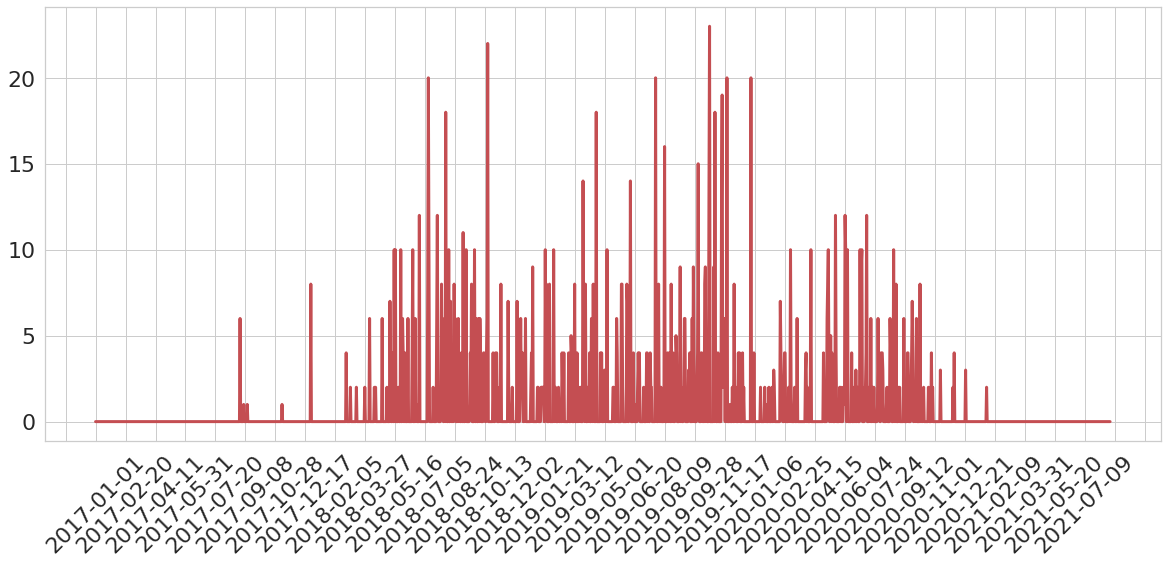

In [4]:
fig, ax = plt.subplots()

ax.plot(df_day['Дата'], df_day['КоличествоОборот'], color = 'r', linewidth = 3)

#  set the interval of major ticks label
ax.xaxis.set_major_locator(ticker.MultipleLocator(50))
ax.tick_params(axis='x', labelrotation = 45)

# plt.figure(figsize=(40,3))
fig.set_figwidth(20)
fig.set_figheight(8)

plt.show()

## 1.2 Decomposition

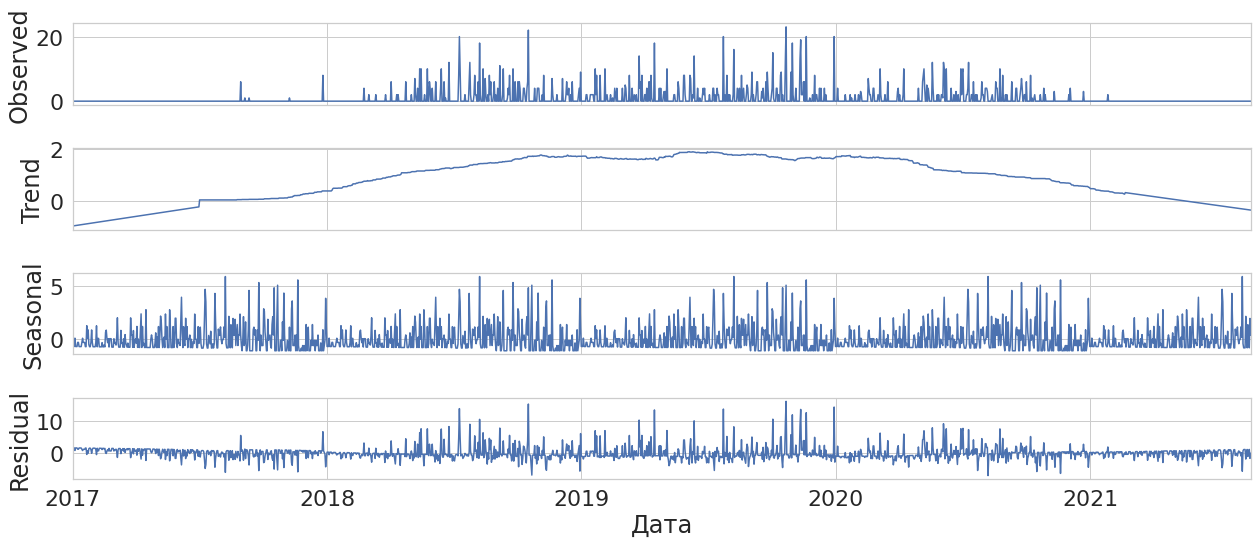

In [5]:
df_day = df_day[['Дата', 'КоличествоОборот']]
s= pd.Series(index=pd.to_datetime(df_day['Дата']),
            data=df_day['КоличествоОборот'].values)
result = seasonal_decompose(s, model='additive', freq=365, extrapolate_trend = 365)

from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
result.plot()
plt.show()

## 1.3 Stationarity and transformation

In [6]:
print('Dickey — Fuller test = ', sm.tsa.stattools.adfuller(df_day['КоличествоОборот']))
print('KPSS test = ', sm.tsa.stattools.kpss(df_day['КоличествоОборот']))
print('Сonflicting results. The time series with target field КоличествоОборот are stationarity according to Dickey — Fuller test and non-stationarity according to KPSS test')

Dickey — Fuller test =  (-3.6793895538157546, 0.004412577621888036, 21, 1671, {'1%': -3.4342694338297464, '5%': -2.863271207750943, '10%': -2.567691652321558}, 7711.35544182463)
KPSS test =  (1.1378517685758889, 0.01, 25, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
Сonflicting results. The time series with target field КоличествоОборот are stationarity according to Dickey — Fuller test and non-stationarity according to KPSS test


In [7]:
df_day['КоличествоОборот_diff'] = df_day['КоличествоОборот'].diff()
print('Dickey — Fuller test = ', sm.tsa.stattools.adfuller(df_day['КоличествоОборот_diff'][1:]))
print('KPSS test = ', sm.tsa.stattools.kpss(df_day['КоличествоОборот_diff'][1:]))
print('The time series with target field КоличествоОборот_diff are stationarity')

Dickey — Fuller test =  (-13.815000698544688, 8.099653266028547e-26, 25, 1666, {'1%': -3.4342812150354276, '5%': -2.8632764080687307, '10%': -2.5676944214132233}, 7717.082464096106)
KPSS test =  (0.00973497853655444, 0.1, 25, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
The time series with target field КоличествоОборот_diff are stationarity


## 1.4 Autocorrelation

In [8]:
for i in range(1, 365):
    df_day[f'lag-{i}'] = df_day['КоличествоОборот'].shift(i)

df_day_corr = pd.DataFrame(df_day[[f'lag-{i}'for i in range(1, 365)]+['КоличествоОборот']].corr()['КоличествоОборот'])
df_day_corr[abs(df_day_corr['КоличествоОборот']) > 0.2]

,КоличествоОборот
lag-14,0.251365
lag-28,0.206849
lag-29,0.224846
lag-49,0.219598
lag-56,0.208054
КоличествоОборот,1.000000


# Dataset with the agregating by weeks

In [9]:
df_week = pd.read_csv('/content/49775_week.csv')
df_week.head()

,Unnamed: 0,Номенклатура,ДатаПонедельника,МесяцГод,КоличествоОборот,СуммаВыручкиБезНДСОборот,Себестоимость,Месяц,"Высота профиля, %","Высота шины, мм",Индекс нагрузки,Комплектность,Максимальная нагрузка,Наружный диаметр шины,Норма слойности,"Посадочный диаметр, дюйм",Предполагаемый контрагент,Сезон,Ширина профиля,Страна происхождения,Сезонная группа,ОстаткиПередНеделей,ОстаткиПослеНедели,Прогноз
0,0,49775,2016-12-26,"[0.2857142857142857, 2017]",0.0,0.0,[],0.285714,NaN,1080.0,149/145,NaN,NaN,NaN,NaN,R20,Кама Торговый дом,NaN,297,РОССИЯ,41_апр-окт,0,0,0
1,1,49775,2017-01-02,"[1, 2017]",0.0,0.0,[],1.000000,NaN,1080.0,149/145,NaN,NaN,NaN,NaN,R20,Кама Торговый дом,NaN,297,РОССИЯ,41_апр-окт,0,0,0
2,2,49775,2017-01-09,"[1, 2017]",0.0,0.0,[],1.000000,NaN,1080.0,149/145,NaN,NaN,NaN,NaN,R20,Кама Торговый дом,NaN,297,РОССИЯ,41_апр-окт,0,0,0
3,3,49775,2017-01-16,"[1, 2017]",0.0,0.0,[],1.000000,NaN,1080.0,149/145,NaN,NaN,NaN,NaN,R20,Кама Торговый дом,NaN,297,РОССИЯ,41_апр-окт,0,0,0
4,4,49775,2017-01-23,"[1, 2017]",0.0,0.0,[],1.000000,NaN,1080.0,149/145,NaN,NaN,NaN,NaN,R20,Кама Торговый дом,NaN,297,РОССИЯ,41_апр-окт,0,0,0


## 2.1 Visialization

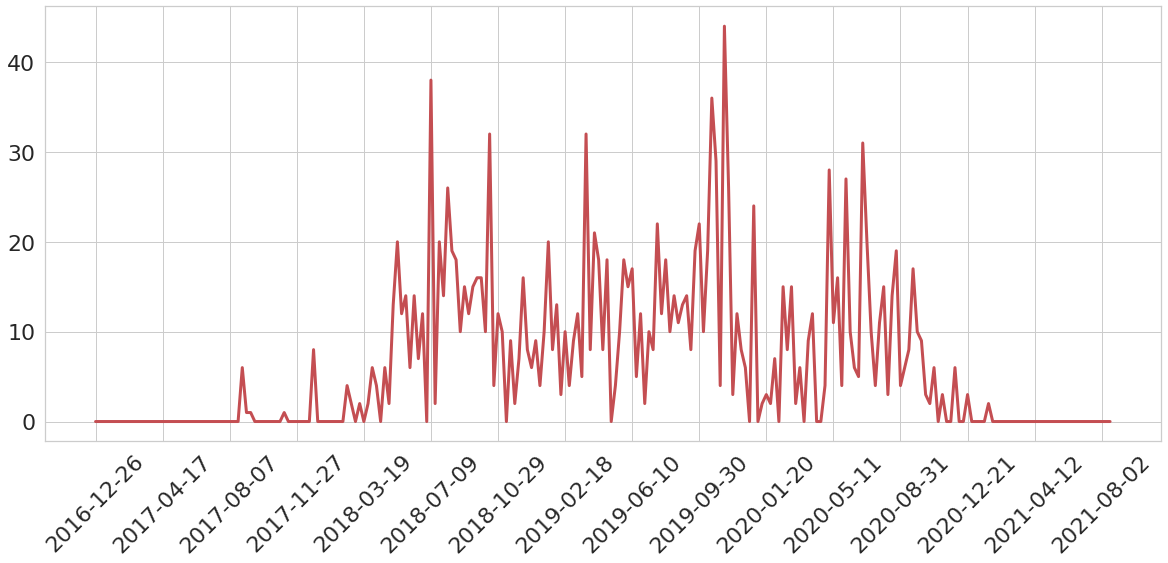

In [10]:
fig, ax = plt.subplots()

ax.plot(df_week['ДатаПонедельника'], df_week['КоличествоОборот'], color = 'r', linewidth = 3)

#  set the interval of major ticks label
ax.xaxis.set_major_locator(ticker.MultipleLocator(16))
ax.tick_params(axis='x', labelrotation = 45)

# plt.figure(figsize=(40,3))
fig.set_figwidth(20)
fig.set_figheight(8)

plt.show()

## 2.2 Decomposition

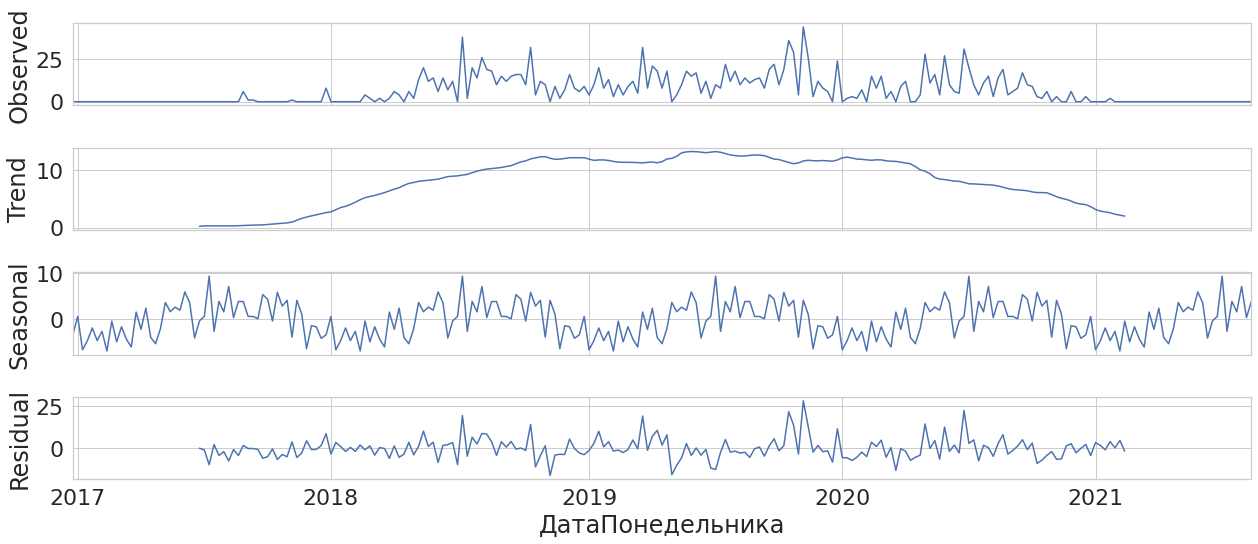

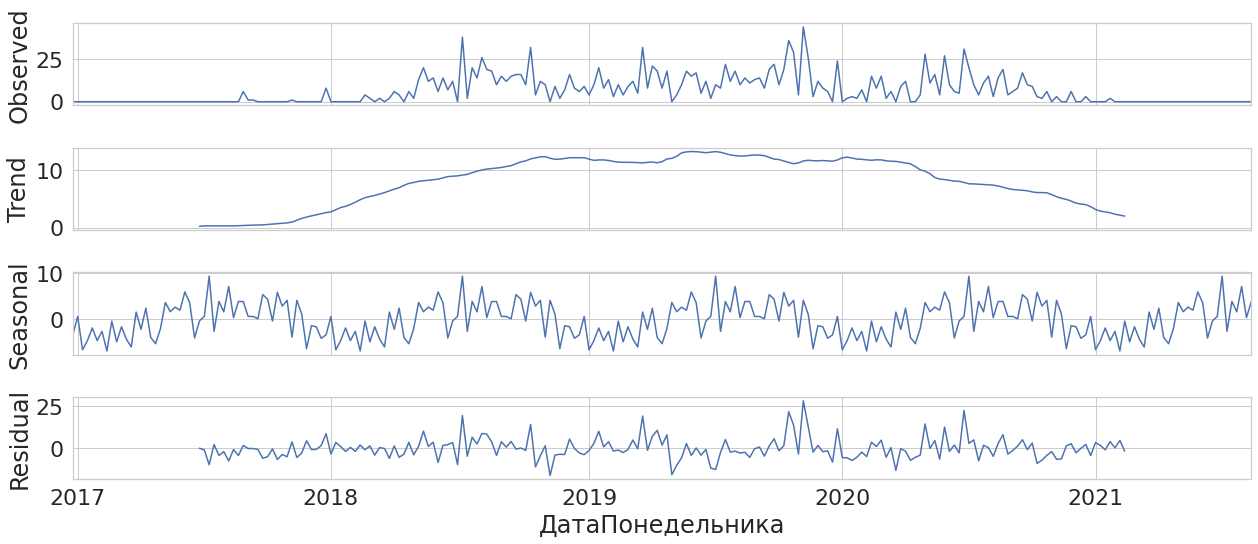

In [12]:
s = pd.Series(index = pd.to_datetime(df_week['ДатаПонедельника']),
              data = df_week['КоличествоОборот'].values)

result = seasonal_decompose(s, model='additive')
result.plot()

## 2.3 Stationarity and transformations

In [13]:
print('Dickey — Fuller test = ', sm.tsa.stattools.adfuller(df_week['КоличествоОборот']))
print('KPSS test = ', sm.tsa.stattools.kpss(df_week['КоличествоОборот']))
print('Сonflicting results. The time series with target field КоличествоОборот are stationarity according to Dickey — Fuller test and non-stationarity according to KPSS test')

Dickey — Fuller test =  (-2.876810211298355, 0.04811187417973027, 3, 239, {'1%': -3.458010773719797, '5%': -2.8737103617125186, '10%': -2.5732559963936206}, 1515.118891288976)
KPSS test =  (0.3505432840034569, 0.09847272241230305, 15, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
Сonflicting results. The time series with target field КоличествоОборот are stationarity according to Dickey — Fuller test and non-stationarity according to KPSS test


In [14]:
df_week['КоличествоОборот_diff'] = df_week['КоличествоОборот'].diff()
print('Dickey — Fuller test = ', sm.tsa.stattools.adfuller(df_week['КоличествоОборот_diff'][1:]))
print('KPSS test = ', sm.tsa.stattools.kpss(df_week['КоличествоОборот_diff'][1:]))
print('Сonflicting results. The time series with target field КоличествоОборот are stationarity according to Dickey — Fuller test and non-stationarity according to KPSS test')

Dickey — Fuller test =  (-8.502517011976797, 1.2274017372088947e-13, 7, 234, {'1%': -3.4586084859607156, '5%': -2.873972159235721, '10%': -2.57339565928848}, 1513.911886573144)
KPSS test =  (0.07398315885236878, 0.1, 15, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
Сonflicting results. The time series with target field КоличествоОборот are stationarity according to Dickey — Fuller test and non-stationarity according to KPSS test


## 2.4 Autocorrelation

In [15]:
for i in range(1, 100):
    df_week[f'lag-{i}'] = df_week['КоличествоОборот'].shift(i)

df_week_corr = pd.DataFrame(df_week[[f'lag-{i}'for i in range(1, 100)]+['КоличествоОборот']].corr()['КоличествоОборот'])
df_week_corr[abs(df_week_corr['КоличествоОборот']) > 0.5]

,КоличествоОборот
lag-2,0.526810
lag-4,0.529279
КоличествоОборот,1.000000


# Dataset with the agregating by month

In [16]:
df_month = pd.read_csv('/content/49775_month.csv')
df_month.head()

,Unnamed: 0,Номенклатура,КоличествоОборот,СуммаВыручкиБезНДСОборот,Себестоимость,Месяц,"Высота профиля, %","Высота шины, мм",Индекс нагрузки,Комплектность,Максимальная нагрузка,Наружный диаметр шины,Норма слойности,"Посадочный диаметр, дюйм",Предполагаемый контрагент,Сезон,Ширина профиля,Страна происхождения,Сезонная группа,МесяцГод,ОстаткиПередМесяцем,ОстаткиПослеМесяца,Прогноз
0,0,49775,0.0,0.0,[],1,NaN,1080.0,149/145,NaN,NaN,NaN,NaN,R20,Кама Торговый дом,NaN,297,РОССИЯ,41_апр-окт,"[1, 2017]",0,0,0
1,1,49775,0.0,0.0,[],2,NaN,1080.0,149/145,NaN,NaN,NaN,NaN,R20,Кама Торговый дом,NaN,297,РОССИЯ,41_апр-окт,"[2, 2017]",0,0,0
2,2,49775,0.0,0.0,[],3,NaN,1080.0,149/145,NaN,NaN,NaN,NaN,R20,Кама Торговый дом,NaN,297,РОССИЯ,41_апр-окт,"[3, 2017]",0,0,0
3,3,49775,0.0,0.0,[],4,NaN,1080.0,149/145,NaN,NaN,NaN,NaN,R20,Кама Торговый дом,NaN,297,РОССИЯ,41_апр-окт,"[4, 2017]",0,0,0
4,4,49775,0.0,0.0,[],5,NaN,1080.0,149/145,NaN,NaN,NaN,NaN,R20,Кама Торговый дом,NaN,297,РОССИЯ,41_апр-окт,"[5, 2017]",0,0,0


## 3.1 Visualization

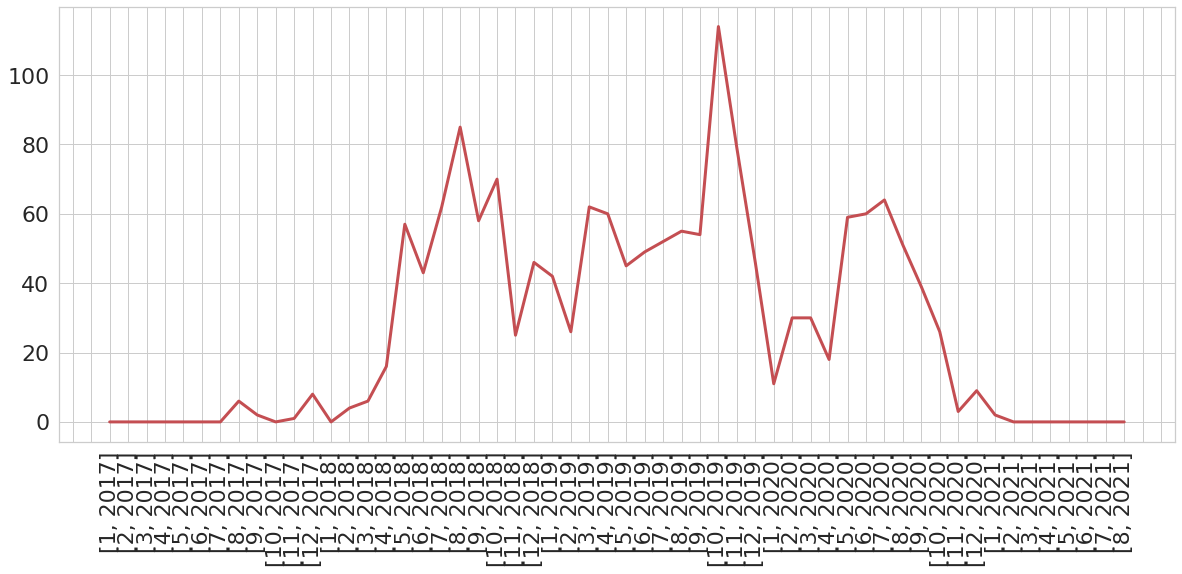

In [17]:
fig, ax = plt.subplots()

ax.plot(df_month['МесяцГод'], df_month['КоличествоОборот'], color = 'r', linewidth = 3)

# set the interval of major ticks label
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.tick_params(axis='x', labelrotation = 90)

# plt.figure(figsize=(40,3))
fig.set_figwidth(20)
fig.set_figheight(8)

plt.show()

## 3.2 Decomposition

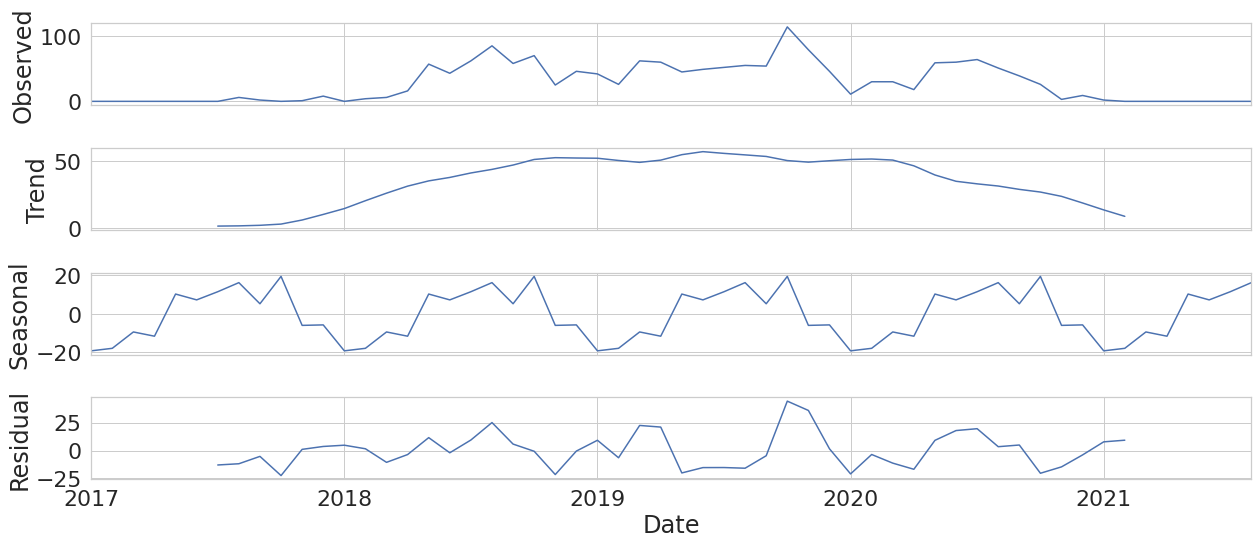

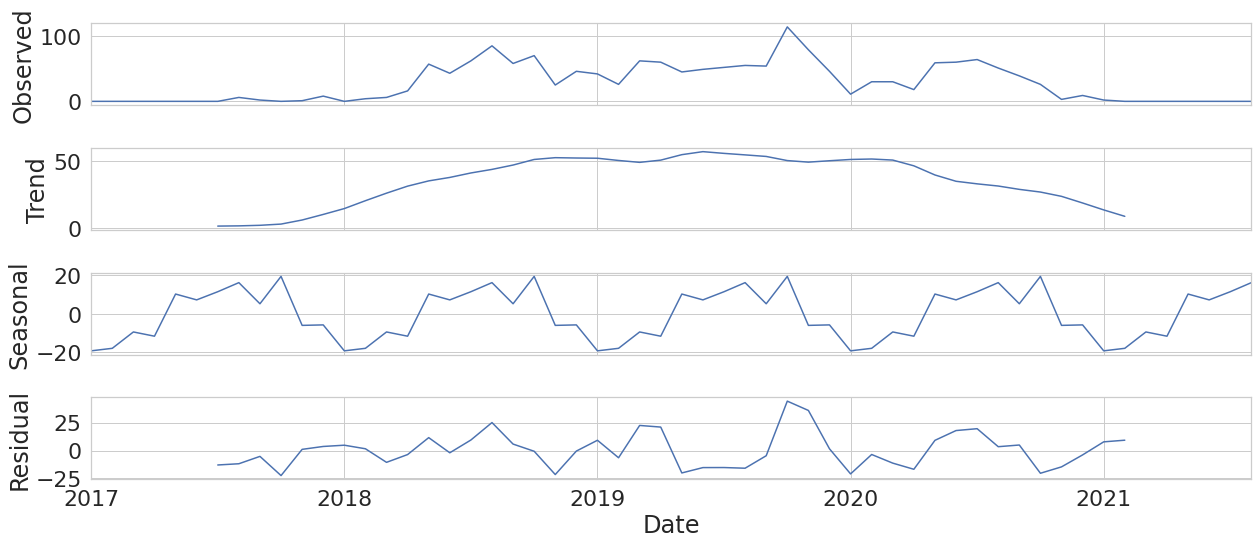

In [18]:
df_month['Date'] = df_month['МесяцГод'].apply(lambda x: x.split(',')[1][:-1] + '-' + x.split(',')[0][1:].zfill(2) + '-01')
df_month[['Date', 'МесяцГод']].head(12)
s = pd.Series(index = pd.to_datetime(df_month['Date']),
              data = df_month['КоличествоОборот'].values)

result = seasonal_decompose(s, model='additive')
result.plot()

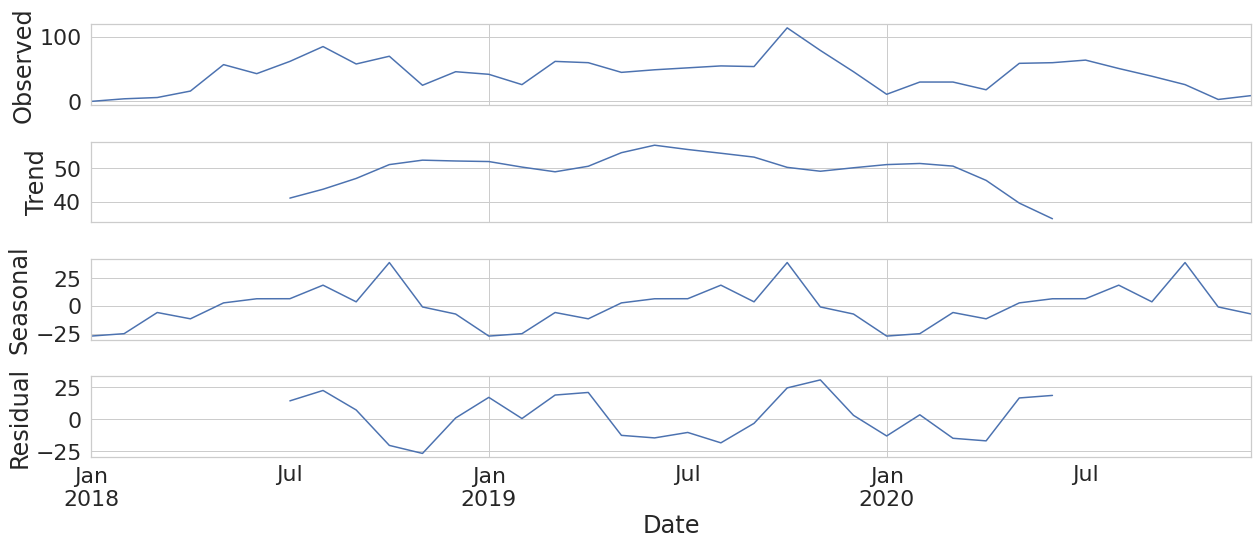

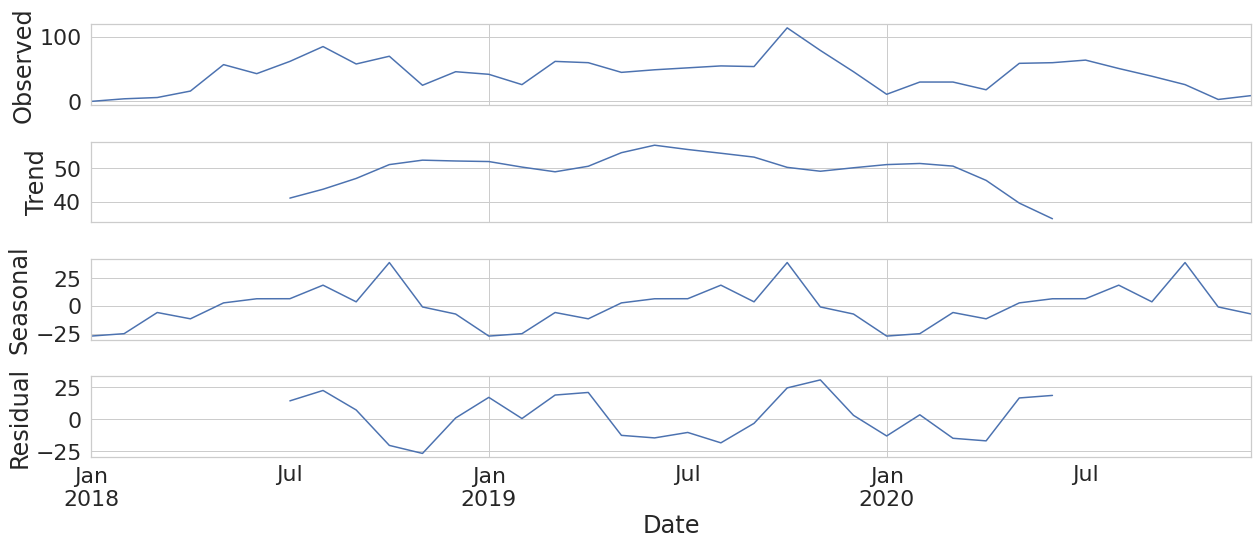

In [19]:
df_month = df_month[12:-8]
s = pd.Series(index = pd.to_datetime(df_month['Date']),
              data = df_month['КоличествоОборот'].values)

result = seasonal_decompose(s, model='additive')
result.plot()

## 2.3 Stationarity and transformation

In [20]:
print('Dickey — Fuller test = ', sm.tsa.stattools.adfuller(df_month['КоличествоОборот']))
print('KPSS test = ', sm.tsa.stattools.kpss(df_month['КоличествоОборот']))
print('Сonflicting results. The time series with target field КоличествоОборот are stationarity according to Dickey — Fuller test and non-stationarity according to KPSS test')

Dickey — Fuller test =  (-3.139398531063335, 0.02377161076974777, 0, 35, {'1%': -3.6327426647230316, '5%': -2.9485102040816327, '10%': -2.6130173469387756}, 224.60490863199755)
KPSS test =  (0.1720693222696756, 0.1, 10, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
Сonflicting results. The time series with target field КоличествоОборот are stationarity according to Dickey — Fuller test and non-stationarity according to KPSS test


In [21]:
# transformation
df_month['КоличествоОборот_diff'] = df_month['КоличествоОборот'].diff()

print('Dickey — Fuller test = ', sm.tsa.stattools.adfuller(df_month['КоличествоОборот_diff'][1:]))
print('KPSS test = ', sm.tsa.stattools.kpss(df_month['КоличествоОборот_diff'][1:]))
print('Сonflicting results. The time series with target field КоличествоОборот_diff are stationarity according to Dickey — Fuller test and non-stationarity according to KPSS test')

Dickey — Fuller test =  (-4.484616322984793, 0.0002096162797595336, 5, 29, {'1%': -3.6790595944893187, '5%': -2.9678817237279103, '10%': -2.6231583472057074}, 219.63077128671964)
KPSS test =  (0.359050369174605, 0.09480587535577371, 10, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
Сonflicting results. The time series with target field КоличествоОборот_diff are stationarity according to Dickey — Fuller test and non-stationarity according to KPSS test


## 2.4 Autocorrelation

In [22]:
for i in range(1, 13):
    df_month[f'lag-{i}'] = df_month['КоличествоОборот'].shift(i)

df_month[[f'lag-{i}'for i in range(1, 13)]+['КоличествоОборот']].corr()['КоличествоОборот']


lag-1               0.566723
lag-2               0.243374
lag-3              -0.083993
lag-4              -0.395533
lag-5              -0.386237
lag-6              -0.354727
lag-7               0.052144
lag-8               0.164522
lag-9               0.109198
lag-10              0.231610
lag-11              0.035293
lag-12             -0.092481
КоличествоОборот    1.000000
Name: КоличествоОборот, dtype: float64